In [ ]:
!pip install Sastrawi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import re
import seaborn as sns
from wordcloud import WordCloud


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FD-WAVE-11/Gold-challange/data.csv', encoding='latin-1')
pd.set_option('display.max_colwidth', None)

In [ ]:
df.head(10)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga',0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU',0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah',1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x9f\x98\x84\xf0\x9f\x98\x84',1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warga dukuh sari jabon,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! paling kampret emang endingnya! 2 karakter utama cowonya kena friendzone bray! XD URL,0,1,0,0,0,0,0,0,0,0,0,0
8,"Nah admin belanja satu lagi port terbaik nak makan Ais Kepal Milo, Ais Kepal Horlicks atau Cendol Toping kaw kaw. ð??­; ; Doket mano tu ? Gerai Rojak Mertuaku - Taipan 2 (depan TWINS BABY &amp; ROMANTIKA / Bank Islam Senawang) ð???",0,0,0,0,0,0,0,0,0,0,0,0
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0


* HS : hate speech label;
* Abusive : abusive language label;
* HS_Individual : hate speech targeted to an individual;
* HS_Group : hate speech targeted to a group;
* HS_Religion : hate speech related to religion/creed;
* HS_Race : hate speech related to race/ethnicity;
* HS_Physical : hate speech related to physical/disability;
* HS_Gender : hate speech related to gender/sexual orientation;
* HS_Other : hate related to other invective/slander;
* HS_Weak : weak hate speech;
* HS_Moderate : moderate hate speech;
* HS_Strong : strong hate speech.



In [ ]:
def clean_text(text):

  # Memisahkan kata-kata setelah hashtag yang tersambung
  pattern = r"#([A-Z][a-z0-9]+)([A-Z][a-z0-9]+)"
  text = re.sub(pattern, r"# \1 \2", text)

  # Mengubah semua huruf menjadi huruf kecil
  text = text.lower()

  # Menghapus spasi di awal dan akhir text
  text = text.strip()

  # Menghapus kata 'user', 'rt', 'amp' dan 'x..'
  text = re.sub(r'\buser\b|\bRT\b|\bamp\b|(\bx[\da-f]{2})', ' ', text, flags=re.IGNORECASE)

  # Menghapus kata '\n'
  text = re.sub(r'\\n', ' ', text, flags=re.IGNORECASE)

  # Menghapus karakter non-alfanumerik
  text = re.sub(r'\W+', ' ', text)

  # Menghapus karakter berulang
  text = re.sub(r'(.)\1+', r'\1', text)

  return text

df['Tweet'] = df['Tweet'].apply(clean_text)


In [ ]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,disat semua cowok berusaha melacak perhatian gue loe lantas remehkan perhatian yg gue kasih khusus ke elo basic elo cowok bego,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat ngasih tau elu edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang aku berfikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh berkali kali kadang aku merasa tuhan itu ningalkan aku sendirian ketika orangtuaku berencana berpisah ketika kakaku lebih memilih jadi kristen ketika aku anak ter,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku ku tau matamu sipit tapi diliat dari mana itu aku,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
df['total_word'] = df.Tweet.apply(lambda text: len(text.split(" ")) )
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_word
0,disat semua cowok berusaha melacak perhatian gue loe lantas remehkan perhatian yg gue kasih khusus ke elo basic elo cowok bego,1,1,1,0,0,0,0,0,1,1,0,0,23
1,siapa yang telat ngasih tau elu edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga,0,1,0,0,0,0,0,0,0,0,0,0,21
2,41 kadang aku berfikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh berkali kali kadang aku merasa tuhan itu ningalkan aku sendirian ketika orangtuaku berencana berpisah ketika kakaku lebih memilih jadi kristen ketika aku anak ter,0,0,0,0,0,0,0,0,0,0,0,0,38
3,aku itu aku ku tau matamu sipit tapi diliat dari mana itu aku,0,0,0,0,0,0,0,0,0,0,0,0,15
4,kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah,1,1,0,1,1,0,0,0,0,0,1,0,14


In [ ]:
df['total_word'].describe()

count    13169.000000
mean        17.429721
std         10.351160
min          1.000000
25%          9.000000
50%         15.000000
75%         23.000000
max         86.000000
Name: total_word, dtype: float64

In [ ]:
df[df['total_word'] == df['total_word'].min()]

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_word
4796,sama,0,0,0,0,0,0,0,0,0,0,0,0,1
9769,viralkan,0,0,0,0,0,0,0,0,0,0,0,0,1
10056,klik,0,0,0,0,0,0,0,0,0,0,0,0,1
10988,klik,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
print(df.loc[df['total_word'] == df['total_word'].max(), 'Tweet'])

654    semoga kita termasuk orang2 dengan wajah yg berseri2 ð jumat berkah ù ù ø ù ù ù ù ù ù ù ù ù ù ø ù ø ù ù ù ù ø ø ù ø ù ø ù wajah wajahâ orang orang mukmin pada hari itu berseri seri al qiyamah 2 ù ù ù ù ø ù ù ù ù ù ù ù ù ù ù ø ù ø ù ø ù ø ø³ù ø ù ø ù danâ wajah wajahâ orang kafir pada hari itu
Name: Tweet, dtype: object


In [ ]:
print(df.loc[df['total_word'] > 50, 'Tweet'])

654      semoga kita termasuk orang2 dengan wajah yg berseri2 ð jumat berkah ù ù ø ù ù ù ù ù ù ù ù ù ù ø ù ø ù ù ù ù ø ø ù ø ù ø ù wajah wajahâ orang orang mukmin pada hari itu berseri seri al qiyamah 2 ù ù ù ù ø ù ù ù ù ù ù ù ù ù ù ø ù ø ù ø ù ø ø³ù ø ù ø ù danâ wajah wajahâ orang kafir pada hari itu
1000                                                               blm jd gub aja sdh nabrak etika gmn kl menjabat emg yg lantik dia kl jd gub dukun ya ato capres kl ga seneng sm presiden yg menjabat ya jgn mau dilantik sm beliau jd jgn jd cagub skr ntar aja kl yg dia dukung sdh jd presiden br nyagub 
3053                                 jan di biasain ngangep cewe ntu kek barang bos karna cewe ntu punya ati n prasan situ kalo cuman nyari bahan bakal ngeue mending lu cari pecun sono bs lu eue trs bayar trs udeh deh masing2 jan cewe bae2 lu rusakin di lobi sbisa lu ampe dpt ngeue hanjer sampah amat 
3632                                                          lau kanal bainanal habib ulam

In [ ]:
def clean_text(text):
  # Menghapus karakter 'ø', 'ù', 'º', 'ð', dan lainnya
  text = re.sub(r'[øùºðµ¹ª³]', '', text, flags=re.IGNORECASE)
  text = re.sub(r'â', 'a', text, flags=re.IGNORECASE)

  # Menghapus spasi berlebih dengan mengganti beberapa spasi menjadi satu spasi
  text = re.sub(r'\s+', ' ', text).strip()

  # Menghapus seluruh kalimat yang hanya berisi spasi
  text = re.sub(r'^\s+$', '', text)

  return text

df['Tweet'] = df['Tweet'].apply(clean_text)

In [ ]:
print(df.loc[df['total_word'] > 50, 'Tweet'])

654                                                                                                   semoga kita termasuk orang2 dengan wajah yg berseri2 jumat berkah wajah wajaha orang orang mukmin pada hari itu berseri seri al qiyamah 2 dana wajah wajaha orang kafir pada hari itu
1000                                             blm jd gub aja sdh nabrak etika gmn kl menjabat emg yg lantik dia kl jd gub dukun ya ato capres kl ga seneng sm presiden yg menjabat ya jgn mau dilantik sm beliau jd jgn jd cagub skr ntar aja kl yg dia dukung sdh jd presiden br nyagub
3053               jan di biasain ngangep cewe ntu kek barang bos karna cewe ntu punya ati n prasan situ kalo cuman nyari bahan bakal ngeue mending lu cari pecun sono bs lu eue trs bayar trs udeh deh masing2 jan cewe bae2 lu rusakin di lobi sbisa lu ampe dpt ngeue hanjer sampah amat
3632                                                                                                                                            lau 

In [ ]:
df['total_word'] = df.Tweet.apply(lambda text: len(text.split(" ")) )
df['total_word'].describe()

count    13169.000000
mean        16.172299
std         10.439674
min          1.000000
25%          8.000000
50%         14.000000
75%         22.000000
max         52.000000
Name: total_word, dtype: float64

In [ ]:
print(f"data duplikat = { df.duplicated().sum()}")

df = df.drop_duplicates()

print(f"data duplikat setelah dibersihkan = {df.duplicated().sum()}")

data duplikat = 248
data duplikat setelah dibersihkan = 0


In [ ]:
df.isna().sum()/df.shape[0]

Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
total_word       0.0
dtype: float64

#Exploratory Data Analysis

In [ ]:
print("Total_word")
print(f"Mean = {df['total_word'].mean()}")
print(f"Median = {df['total_word'].median()}")
print(f"Modus = {df['total_word'].mode()}")

Total_word
Mean = 16.231793204860306
Median = 14.0
Modus = 0    10
Name: total_word, dtype: int64


In [ ]:
#quartile dan interquartile range

#cari nilai minimum
p0_word = df.total_word.min()

#cari nilai maximum
p100_word = df.total_word.max()

#cari quartile 1
q1_word = df.total_word.quantile(0.25)

#cari quartile 2
q2_word = df.total_word.quantile(0.5)

#cari quartile 3
q3_word = df.total_word.quantile(0.75)

#cari IQR
iqr_word = q3_word - q1_word

#cari batas bawah
lower_limit_word = q1_word - 1.5 * iqr_word

#cari batas atas
upper_limit_word = q3_word + 1.5 * iqr_word

In [ ]:
print("batas bawah (minimum) `total_word` : ", lower_limit_word)
print("nilai terkecil :", p0_word)

if lower_limit_word < p0_word:
  print("tidak ada outlier dari sisi batas bawah")
else:
  print("ada outlier dari sisi batas bawah")

print()

print("batas atas (maximum) `total_word` : ", upper_limit_word)
print("nilai terbesar", p100_word)

if upper_limit_word > p100_word:
  print("tidak ada outlier dari sisi batas atas")
else:
  print("ada outlier dari sisi batas atas")

batas bawah (minimum) `total_word` :  -13.0
nilai terkecil : 1
tidak ada outlier dari sisi batas bawah

batas atas (maximum) `total_word` :  43.0
nilai terbesar 52
ada outlier dari sisi batas atas


In [ ]:
outlier = df.loc[df['total_word'] >= upper_limit_word, 'Tweet'].count()
total_rows = df.shape[0]

print(f"Jumlah data outlier = {outlier}")
print(f"Presentase jumlah outlier = {(outlier/total_rows*100).round(2)}")

Jumlah data outlier = 144
Presentase jumlah outlier = 1.11


In [ ]:
HS_outlier = df.loc[df['total_word'] >= upper_limit_word, ["HS", "Abusive", "HS_Individual", "HS_Group", "HS_Religion", "HS_Race", "HS_Physical", "HS_Gender", "HS_Other", "HS_Weak", "HS_Moderate", "HS_Strong"]].sum()
persentage = HS_outlier / outlier *100
print("\nPersentase hate speech pada data outlier\n")
print(f"{persentage.round(2)}")


Persentase hate speech pada data outlier

HS               16.67
Abusive          33.33
HS_Individual    11.11
HS_Group          5.56
HS_Religion       0.69
HS_Race           2.78
HS_Physical       0.69
HS_Gender         2.78
HS_Other         10.42
HS_Weak          10.42
HS_Moderate       5.56
HS_Strong         0.69
dtype: float64


In [ ]:
print(f"Skewness total_word = {df['total_word'].skew()}")
print("Nilai skewness total_word > 0 maka, data total_word memiliki distribusi positive skew")

Skewness total_word = 0.8214359623381063
Nilai skewness total_word > 0 maka, data total_word memiliki distribusi positive skew


In [ ]:
print(f"Kurtosis total_word = {df['total_word'].kurtosis()}")
print("Nilai Kurtosis total_word < 2 maka, data total_word memiliiki distribusi platykurtic yang mengidikasikan adanya outlier namun tidak signifikan")

Kurtosis total_word = -0.12214096151291765
Nilai Kurtosis total_word < 2 maka, data total_word memiliiki distribusi platykurtic yang mengidikasikan adanya outlier namun tidak signifikan


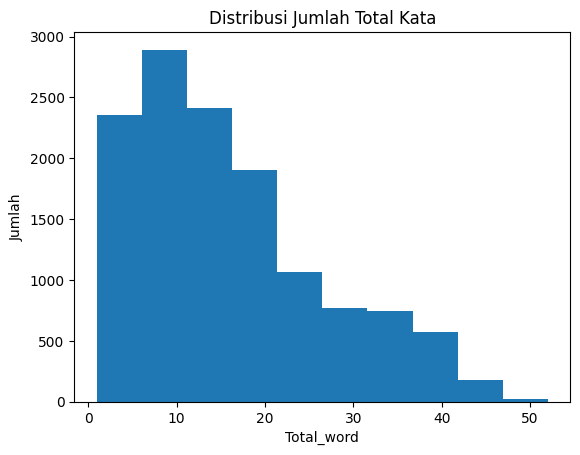

In [ ]:
plt.hist(x='total_word', data=df)
plt.xlabel('Total_word')
plt.ylabel('Jumlah')
plt.title('Distribusi Jumlah Total Kata')
plt.show()

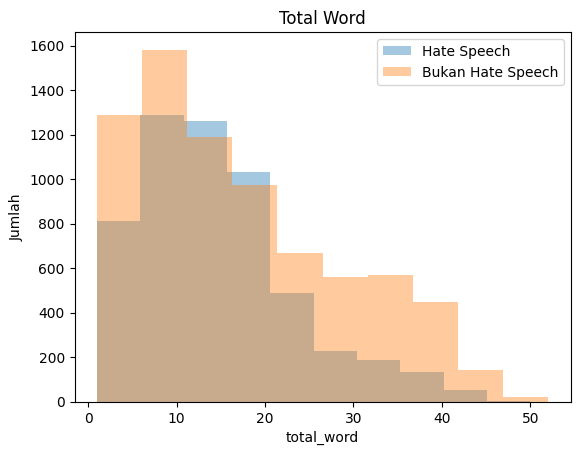

In [ ]:
df_HS = df['HS']==1
df_no_HS = df['HS']==0

plt.hist(df.loc[df_HS,'total_word'], label='Hate Speech' , alpha=0.4)
plt.hist(df.loc[df_no_HS,'total_word'], label='Bukan Hate Speech' , alpha=0.4)

plt.legend()
plt.ylabel("Jumlah")
plt.xlabel("total_word")
plt.title('Total Word')
plt.show()

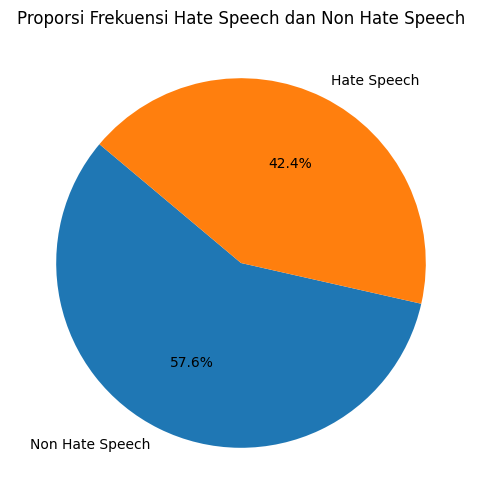

In [ ]:
Hate_value_count = df['HS'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(Hate_value_count, labels=['Non Hate Speech', 'Hate Speech'], autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Frekuensi Hate Speech dan Non Hate Speech')
plt.show()

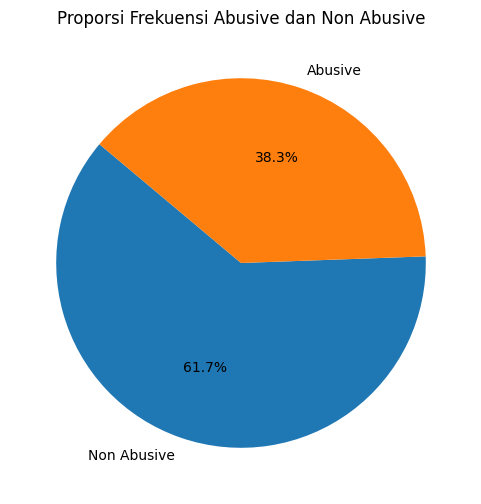

In [ ]:
abusive_value_count = df['Abusive'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(abusive_value_count, labels=['Non Abusive', 'Abusive'], autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Frekuensi Abusive dan Non Abusive')
plt.show()

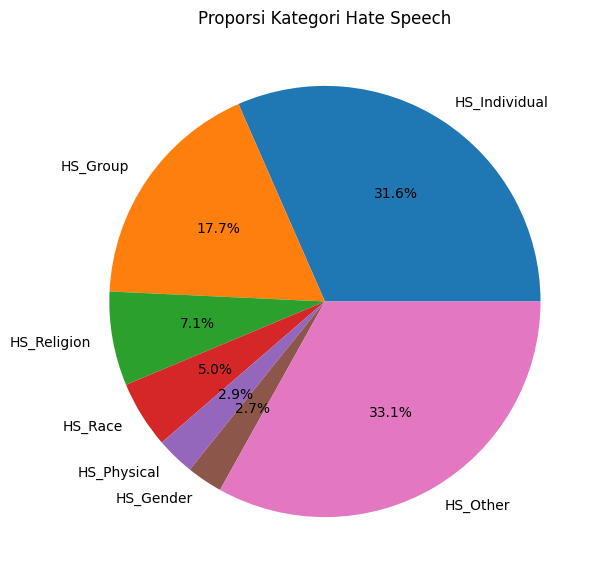

In [ ]:
categories = ['HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']
counts = [df[category].sum() for category in categories]

plt.figure(figsize=(7,7))
plt.pie(counts, labels=categories, autopct='%1.1f%%')
plt.title('Proporsi Kategori Hate Speech')
plt.show()


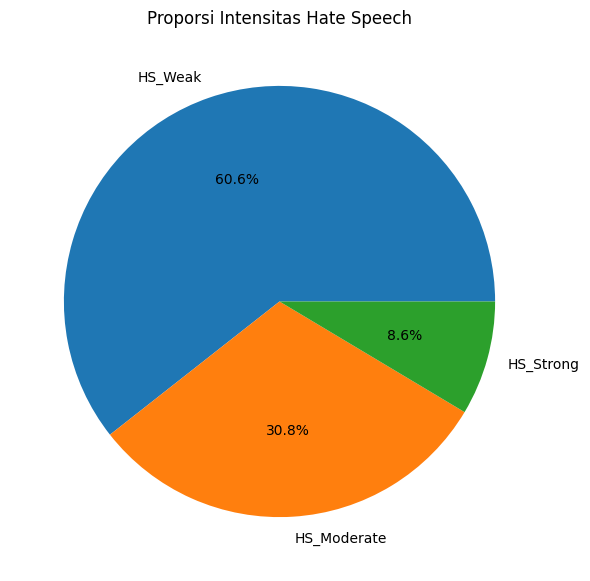

In [ ]:
categories = ['HS_Weak', 'HS_Moderate', 'HS_Strong']
counts = [df[category].sum() for category in categories]

plt.figure(figsize=(7,7))
plt.pie(counts, labels=categories, autopct='%1.1f%%')
plt.title('Proporsi Intensitas Hate Speech')
plt.show()

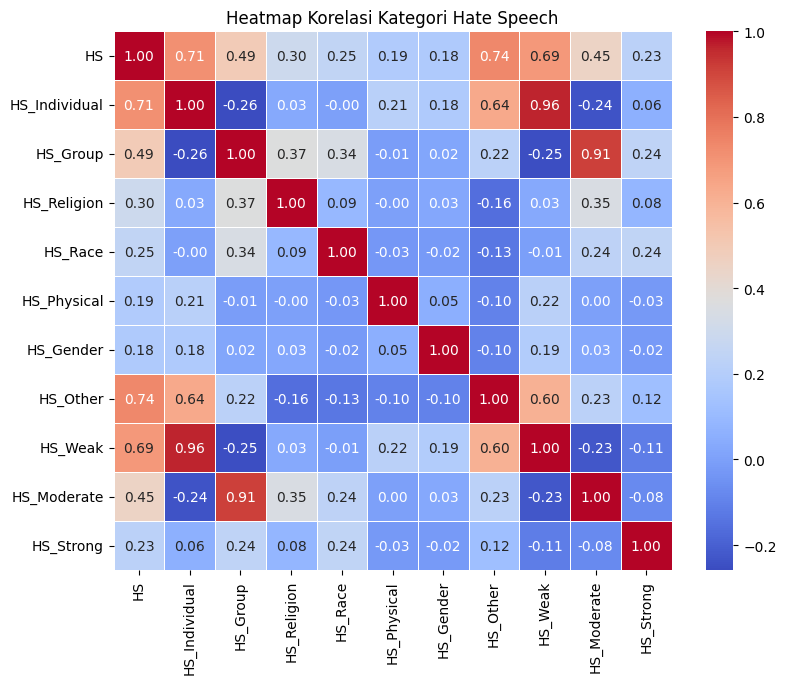

In [ ]:
categories = ['HS','HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']
correlation = df[categories].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Kategori Hate Speech')
plt.show()

#Word Cloud

In [ ]:
factory = StopWordRemoverFactory().get_stop_words()
more_stopword = ['ada', 'yg', 'yang', 'url', 'aja', 'aku', 'apa', 'sama', 'ga', 'gak', 'orang', 'nya', 'kalo', 'jadi', 'n', 'mau', 'bukan', 'gue', 'kalau', 'lo', 'lu', 'semua', 'tak', 'kan', 'buat', 'banyak', 'udah', 'lah', 'kok', 'si', 'di']

data = factory + more_stopword

dictionary = ArrayDictionary(data)
stopword = StopWordRemover(dictionary)



Word Cloud dengan Data Hate Speech



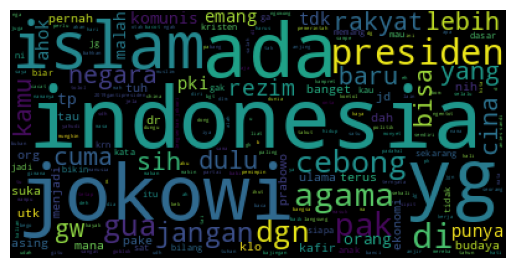

In [ ]:
df_stopword =[]

for text in df['Tweet']:
  stop = stopword.remove(text)
  df_stopword.append(stop)

text = ' '.join(df_stopword)
wordcloud = WordCloud().generate(text)

print("\nWord Cloud dengan Data Hate Speech\n")

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


Word Cloud dengan Data Hate Speech



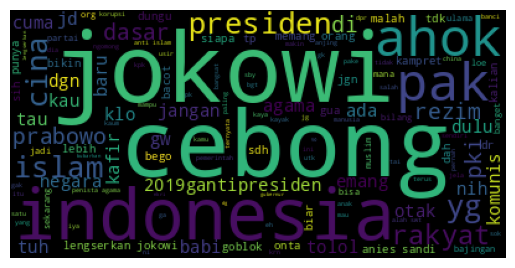

In [ ]:
df_stopword =[]
for text in df.loc[df['HS']==1,'Tweet']:
  stop = stopword.remove(text)
  df_stopword.append(stop)

text = ' '.join(df_stopword)
wordcloud = WordCloud().generate(text)

print("\nWord Cloud dengan Data Hate Speech\n")

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


Word Cloud dengan Data Abusive



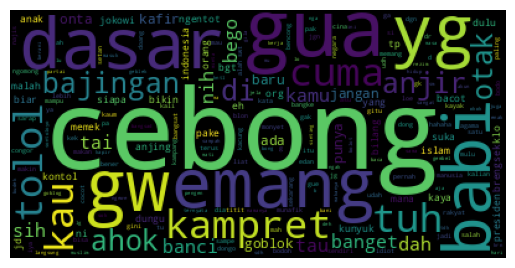

In [ ]:
df_stopword =[]
for text in df.loc[df['Abusive']==1,'Tweet']:
  stop = stopword.remove(text)
  df_stopword.append(stop)

text = ' '.join(df_stopword)
wordcloud = WordCloud().generate(text)

print("\nWord Cloud dengan Data Abusive\n")

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


Word Cloud dengan Data Hate Speech Individual



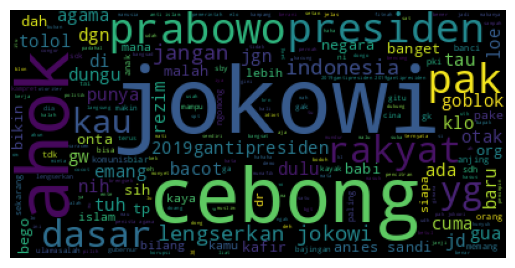

In [ ]:
df_stopword =[]
for text in df.loc[df['HS_Individual']==1,'Tweet']:
  stop = stopword.remove(text)
  df_stopword.append(stop)

text = ' '.join(df_stopword)
wordcloud = WordCloud().generate(text)

print("\nWord Cloud dengan Data Hate Speech Individual\n")

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


Word Cloud dengan Data Hate Speech Group



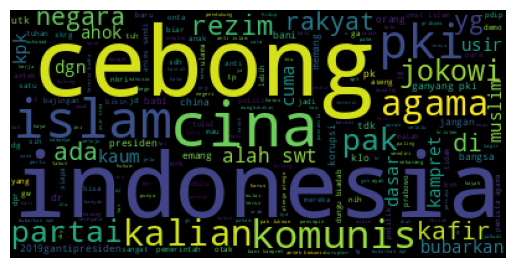

In [ ]:
df_stopword =[]
for text in df.loc[df['HS_Group']==1,'Tweet']:
  stop = stopword.remove(text)
  df_stopword.append(stop)

text = ' '.join(df_stopword)
wordcloud = WordCloud().generate(text)

print("\nWord Cloud dengan Data Hate Speech Group\n")

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


Word Cloud dengan Data Hate Speech Agama



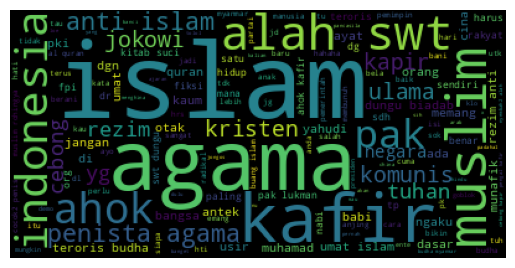

In [ ]:
df_stopword =[]
for text in df.loc[df['HS_Religion']==1,'Tweet']:
  stop = stopword.remove(text)
  df_stopword.append(stop)

text = ' '.join(df_stopword)
wordcloud = WordCloud().generate(text)

print("\nWord Cloud dengan Data Hate Speech Agama\n")

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


Word Cloud dengan Data Hate Speech Ras



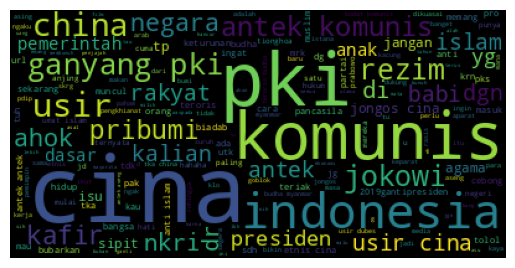

In [ ]:
df_stopword =[]
for text in df.loc[df['HS_Race']==1,'Tweet']:
  stop = stopword.remove(text)
  df_stopword.append(stop)

text = ' '.join(df_stopword)
wordcloud = WordCloud().generate(text)

print("\nWord Cloud dengan Data Hate Speech Ras\n")

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


Word Cloud dengan Data Hate Speech Physical



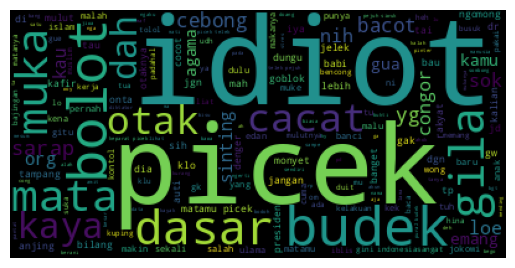

In [ ]:
df_stopword =[]
for text in df.loc[df['HS_Physical']==1,'Tweet']:
  stop = stopword.remove(text)
  df_stopword.append(stop)

text = ' '.join(df_stopword)
wordcloud = WordCloud().generate(text)

print("\nWord Cloud dengan Data Hate Speech Physical\n")

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


Word Cloud dengan Data Hate Speech Gender



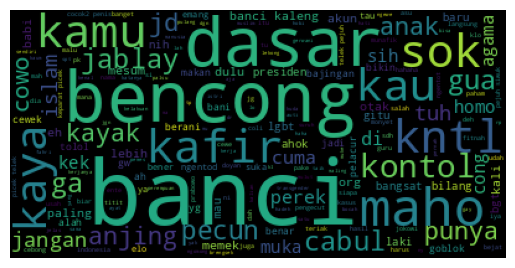

In [ ]:
df_stopword =[]
for text in df.loc[df['HS_Gender']==1,'Tweet']:
  stop = stopword.remove(text)
  df_stopword.append(stop)

text = ' '.join(df_stopword)
wordcloud = WordCloud().generate(text)

print("\nWord Cloud dengan Data Hate Speech Gender\n")

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


Word Cloud dengan Data Hate Speech Strong



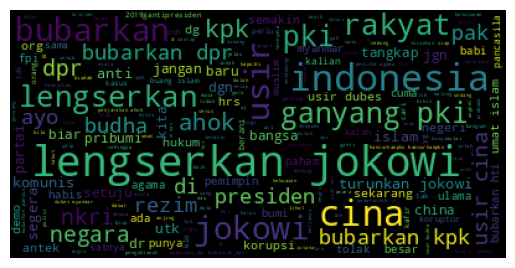

In [ ]:
df_stopword =[]
for text in df.loc[df['HS_Strong']==1,'Tweet']:
  stop = stopword.remove(text)
  df_stopword.append(stop)

text = ' '.join(df_stopword)
wordcloud = WordCloud().generate(text)

print("\nWord Cloud dengan Data Hate Speech Strong\n")

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

1. Univariate Analysis

  a. Dalam statistik deskriptif menunjukan data yang diolah mempunyai nilai outlier namun tidak signifikan. Persentase jumlah data outlier yang terdapat pada data berkisar 1,1%

  b. Dalam visualisasi menunjukan:
    - Rata-rata total kata tweet sebanyak 10-20 kata. Dengan tweet dengan kata paling sedikit sebanyak 1 kata dan tweet dengan kata paling banyak sebanyak 52 kata.

    - Data didoninasi oleh tweet yang bukan merupakan kategori tweet hate speech sebesar 57,6% dan sisanya merupakan tweet dengan kategori hate speech sebesar 42,4%.

    - Sebanyak 36,3% tweet merupakan kategori abusive dan 61,7% bukan merupakan tweet abusive.
    
    - Kata yang sering muncul pada weet dengan kategori hate speech yaitu: Jokowi, Indonesia, Pak, Cebong, Ahok, Presiden.

2. Bivariate dan Multivariate Analysis

  Dalam visualisasi menunjukan:
    - Tweet yang merupakan golongan hate speech memiliki 31.6% kategori individual, 17.7% kategori grup, 7.1% kategori religion, 5% kategori race, 2.9% kategori physical, 2.7% kategori gender, selebinya kategori lainnya yang tidak diketahui sebesar 33.1%
    
    - Pada umunya jenis tweet hate speech yang terdapat pada data pada merupakan hate speech yang tergolong lemah sebanyak 60,6%, sisanya diikuti oleh sedang 30,8% dan kemudian kuat sebanyak 8,6%.
    
    - Variable hate speech memiliki korelasi sebesar 0.71 dengan variabel HS_Individual, sedangkan korelasi variabel hate speech dengan variabel HS_Group sebesar 0.49. Yang artinya sebagian besar tweet kategori hate speech yang di lontarkan merujuk pada suatu individu tertentu.

    - Jenis tweet hate speech yang merujuk pada kalangan grup memiliki intensitas hate speech yang menengah dengan besar korelasi yaitu 0.91. Dan, jenis tweet hate speech yang merujuk pada suatu individu memiliki intensitas hate speech yang lemah dengan korelasi sebesar 0.96.

    -






In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FD-WAVE-11/Gold-challange/Tweet with Sentiment.csv', encoding='latin-1')
pd.set_option('display.max_colwidth', None)

In [ ]:
df.head()

,Tweet,Tweets_clean,Sentiment
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',disaat semua cowok berusaha melacak perhatian gue loe lantas remehkan perhatian yg gue kasih khusus ke elo basic elo cowok bego,Negative
1,RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga',rt user user siapa yang telat ngasih tau elu edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga,Negative
2,"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter",41 kadang aku berfikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh berkali kali kadang aku merasa tuhan itu ninggalkan aku sendirian ketika orangtuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika aku anak ter,Negative
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU',user user aku itu aku n nku tau matamu sipit tapi diliat dari mana itu aku,Negative
4,USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah',user user kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah,Negative
